# Lectura de archivos

In [2]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id = '1FAjcexe-71nGuYIzvnQ46IdXVcqM9cx4'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values_complete_features.csv')

test_values1 = pd.read_csv('test_values_complete_features.csv', encoding='latin-1', index_col='building_id')

test_values1[test_values1.select_dtypes('O').columns] = test_values1[test_values1.select_dtypes('O').columns].astype('category')

In [5]:
id = '1qs2mEnkqiAqebJE2SvqkrfoV66Edguwr'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values_complete_features.csv')

train_values1 = pd.read_csv('train_values_complete_features.csv', encoding='latin-1', index_col='building_id')

train_values1[train_values1.select_dtypes('O').columns] = train_values1[train_values1.select_dtypes('O').columns].astype('category')

In [6]:
id='1RUtolRcQlR3RGULttM4ZoQaK_Ouow4gc'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')
train_labels = pd.read_csv('train_labels.csv', encoding='latin-1', dtype={'building_id': 'int64', 'damage_grade': 'int64'}, index_col='building_id')

In [8]:
id='1br3fMwXX_J0XmiXvOm_wfKWvHSj45T3y'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')
train_values2 = pd.read_csv('train_values.csv', encoding='latin-1', index_col='building_id')

train_values2[train_values2.select_dtypes('O').columns] = train_values2[train_values2.select_dtypes('O').columns].astype('category')

In [9]:
id = '1kt2VFhgpfRS72wtBOBy1KDat9LanfMZU'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values.csv')
test_values2 = pd.read_csv('test_values.csv', encoding='latin-1', index_col='building_id')

test_values2[test_values2.select_dtypes('O').columns] = test_values2[test_values2.select_dtypes('O').columns].astype('category')

In [10]:
train_values_complete = train_values1.copy()
test_values_complete = test_values1.copy()
train_values_incomplete = train_values2.copy()
test_values_incomplete = test_values2.copy()

# Preparación de los sets de datos

## One-Hot Encoding

Importo one_hot_encoder que hice en otro notebook

In [11]:
id='1-bfZTxHA-PGfU9FLUy0E1u4oWRhBZn7V'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('one_hot_encoder.py')

In [12]:
from one_hot_encoder import encoder

## Feature Selection

In [13]:
from google.colab import files
uploaded = files.upload()

Saving select_features_methods.py to select_features_methods.py


In [14]:
from select_features_methods import select_features_method1, select_features_method4

# Random Forest sencillo

In [6]:
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings

In [24]:
x = encoder(train_values)
y = train_labels

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [26]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(x_train, y_train)
rf_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(x_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest
Fit Time: 174.11161851882935 seconds
Prediction Time: 1.4408552646636963 seconds
Training Score: 0.755487336914812
Test Score: 0.7336198461272807


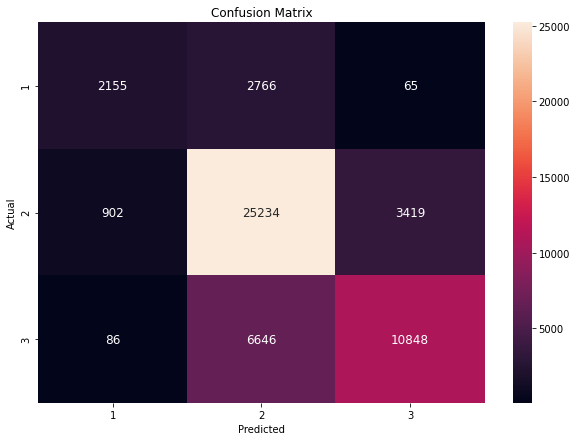

In [27]:
y_pred = rf.predict(x_test)

data = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()

In [29]:
results = list(zip(x, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance.head(25)

,Feature,Importance
0,geo_level_1_id,0.367442
1,geo_level_2_id,0.187314
35,foundation_type_r,0.105539
2,geo_level_3_id,0.087632
4,age,0.040508
5,area_percentage,0.032562
8,has_superstructure_mud_mortar_stone,0.031573
6,height_percentage,0.021891
34,foundation_type_i,0.013670
47,other_floor_type_q,0.013429


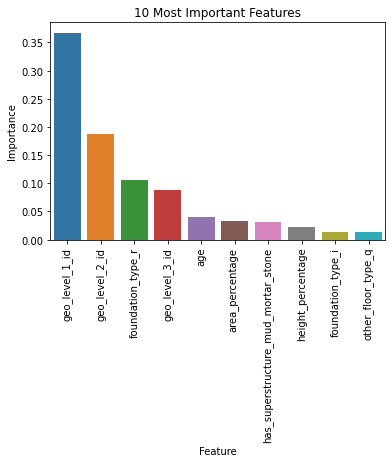

In [30]:
importance_10 = importance.head(10)
plot = sns.barplot(x=importance_10["Feature"], y=importance_10["Importance"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("10 Most Important Features")
plt.show()

In [32]:
test_building_id = test_values.reset_index()["building_id"]
#test_values.drop(columns = ["building_id"], inplace=True)

In [33]:
test_values["age"] = winsorize(test_values["age"],(0, 0.05))
test_values["area_percentage"] = winsorize(test_values["area_percentage"],(0, 0.055))
test_values["height_percentage"] = winsorize(test_values["height_percentage"],(0, 0.04))

In [34]:
#test_values = pd.get_dummies(test_values, drop_first = True)
test_values = encoder(test_values)

In [35]:
#Predictions
predictions = rf.predict(test_values)

In [36]:
#Create Submission File
submission = pd.DataFrame()
submission["building_id"] = test_building_id
submission["damage_grade"] = predictions
submission.head()
submission.to_csv("submission.csv", index=False)

In [ ]:
submission.head()

# Random Forest sumándole los features nuevos

In [15]:
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings

In [16]:
train_values = train_values_complete.copy()
test_values = test_values_complete.copy()

In [17]:
train_values = encoder(train_values)
test_values = encoder(test_values)

In [18]:
x = train_values
y = train_labels

Uso todos los features y después me quedo solo con los más importantes, esto puede hacer que el modelo tarde más

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [20]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(x_train, y_train)
rf_time_fit = time.time() - start_time

start_time = time.time()
model.predict(x_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest
Fit Time: 781.6685264110565 seconds
Prediction Time: 2.108757257461548 seconds
Training Score: 0.5943207981580967
Test Score: 0.5614819362636941


In [35]:
results = list(zip(x, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
selected_features = importance.head(68)
selected_features = selected_features['Feature'].tolist()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_train[selected_features], y_train, test_size = 0.1, random_state = 9)

In [37]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(x_train, y_train)
rf_time_fit = time.time() - start_time

start_time = time.time()
model.predict(x_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(x_train, y_train)))
print("Test Score: {}".format(rf.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest
Fit Time: 530.152473449707 seconds
Prediction Time: 0.6727759838104248 seconds
Training Score: 0.5964547625138569
Test Score: 0.5581830391404451


### Analizo outliers de los features que elijo

In [ ]:
test_building_id = test_values.reset_index()["building_id"]
#test_values.drop(columns = ["building_id"], inplace=True)

In [ ]:
test_values["age"] = winsorize(test_values["age"],(0, 0.05))
test_values["area_percentage"] = winsorize(test_values["area_percentage"],(0, 0.055))
test_values["height_percentage"] = winsorize(test_values["height_percentage"],(0, 0.04))

In [ ]:
#test_values = pd.get_dummies(test_values, drop_first = True)
test_values = encoder(test_values)

In [ ]:
#Predictions
predictions = rf.predict(test_values)

In [ ]:
#Create Submission File
submission = pd.DataFrame()
submission["building_id"] = test_building_id
submission["damage_grade"] = predictions
submission.head()
submission.to_csv("submission.csv", index=False)

In [ ]:
submission.head()